In [3]:
# Célula 1: Importar Bibliotecas

# Bibliotecas para manipulação de dados
import numpy as np
import pandas as pd

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Funções e modelos do scikit-learn
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

print("Bibliotecas importadas com sucesso.")

Bibliotecas importadas com sucesso.


In [22]:
# Célula 2: Funções Manuais para Regressão e Métricas

def manual_linear_regression(X, y):
    """
    Calcula os coeficientes da regressão linear usando a Equação Normal.
    X: Matriz de features (já padronizada).
    y: Vetor alvo.
    Retorna: (intercepto, coeficientes)
    """
    # Adicionar uma coluna de 1s para o intercepto
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    
    # Equação Normal: beta = (X^T * X)^(-1) * X^T * y
    try:
        beta = np.linalg.pinv(X_b.T @ X_b) @ (X_b.T @ y)
    except np.linalg.LinAlgError:
        # Usar a Inversa de Moore-Penrose se a matriz for singular
        beta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y
        
    intercept = beta[0]
    coefficients = beta[1:]
    return intercept, coefficients

def manual_predict(X, intercept, coefficients):
    """ Faz predições usando os coeficientes calculados manualmente. """
    return X @ coefficients + intercept

def manual_r2_score(y_true, y_pred):
    """ Calcula o R² (R-quadrado) manualmente. """
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    return 1 - (ss_residual / ss_total)

def manual_rmse(y_true, y_pred):
    """ Calcula o RMSE (Raiz do Erro Quadrático Médio) manualmente. """
    mse = np.mean((y_true - y_pred)**2)
    return np.sqrt(mse)

print("Funções manuais de cálculo definidas.")

Funções manuais de cálculo definidas.


In [23]:
# Célula 3: Parte A - Tarefa 1: Carregar e Preparar os Dados

# 1. Carregar o dataset
diabetes_dataset = load_diabetes(as_frame=True)
df = diabetes_dataset.frame

# Exibe as 5 primeiras linhas para verificação
print("Amostra do DataFrame:")
display(df.head())

# Salva o dataset completo em um arquivo CSV para referência
df.to_csv('diabetes_dataset_completo.csv', index=False)
print("\nDataset salvo com sucesso no arquivo: 'diabetes_dataset_completo.csv'")

Amostra do DataFrame:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0



Dataset salvo com sucesso no arquivo: 'diabetes_dataset_completo.csv'


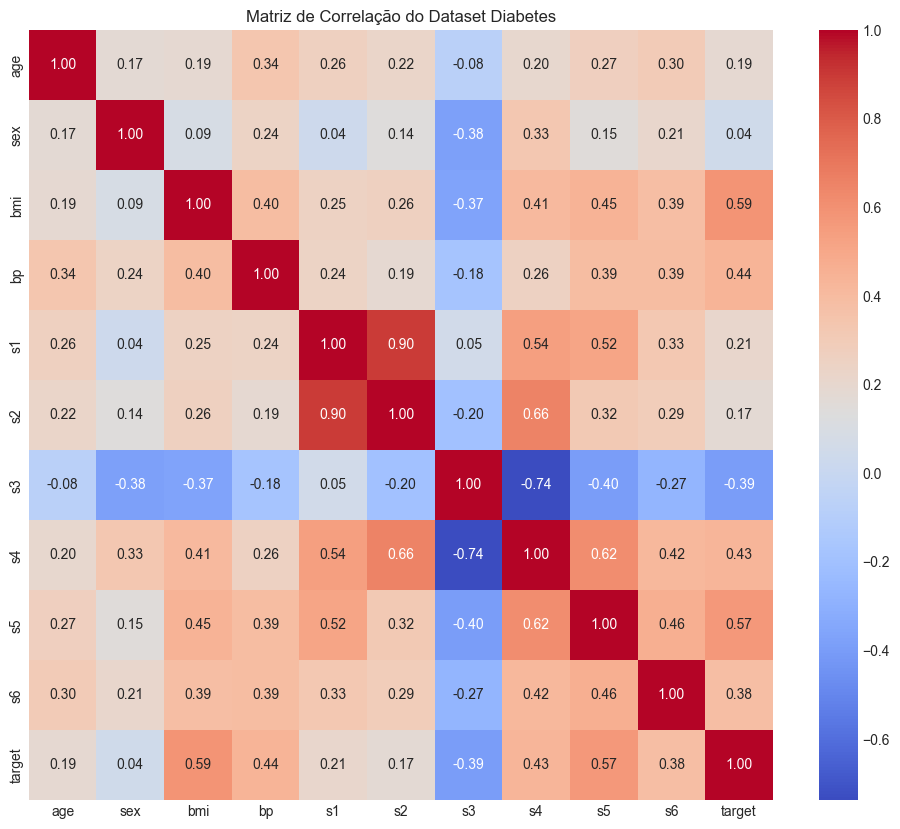


Correlação de cada feature com a variável 'target':
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


In [24]:
# Célula 4: Parte A - Tarefa 2: Análise Exploratória de Dados (EDA)

# 2.1 Calcular a matriz de correlação
correlation_matrix = df.corr()

# 2.2 Visualizar a matriz com um heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação do Dataset Diabetes')
plt.show()

# 2.3 Focar na correlação com a variável alvo
print("\nCorrelação de cada feature com a variável 'target':")
print(correlation_matrix['target'].sort_values(ascending=False))

Distribuição de Valores por Feature:


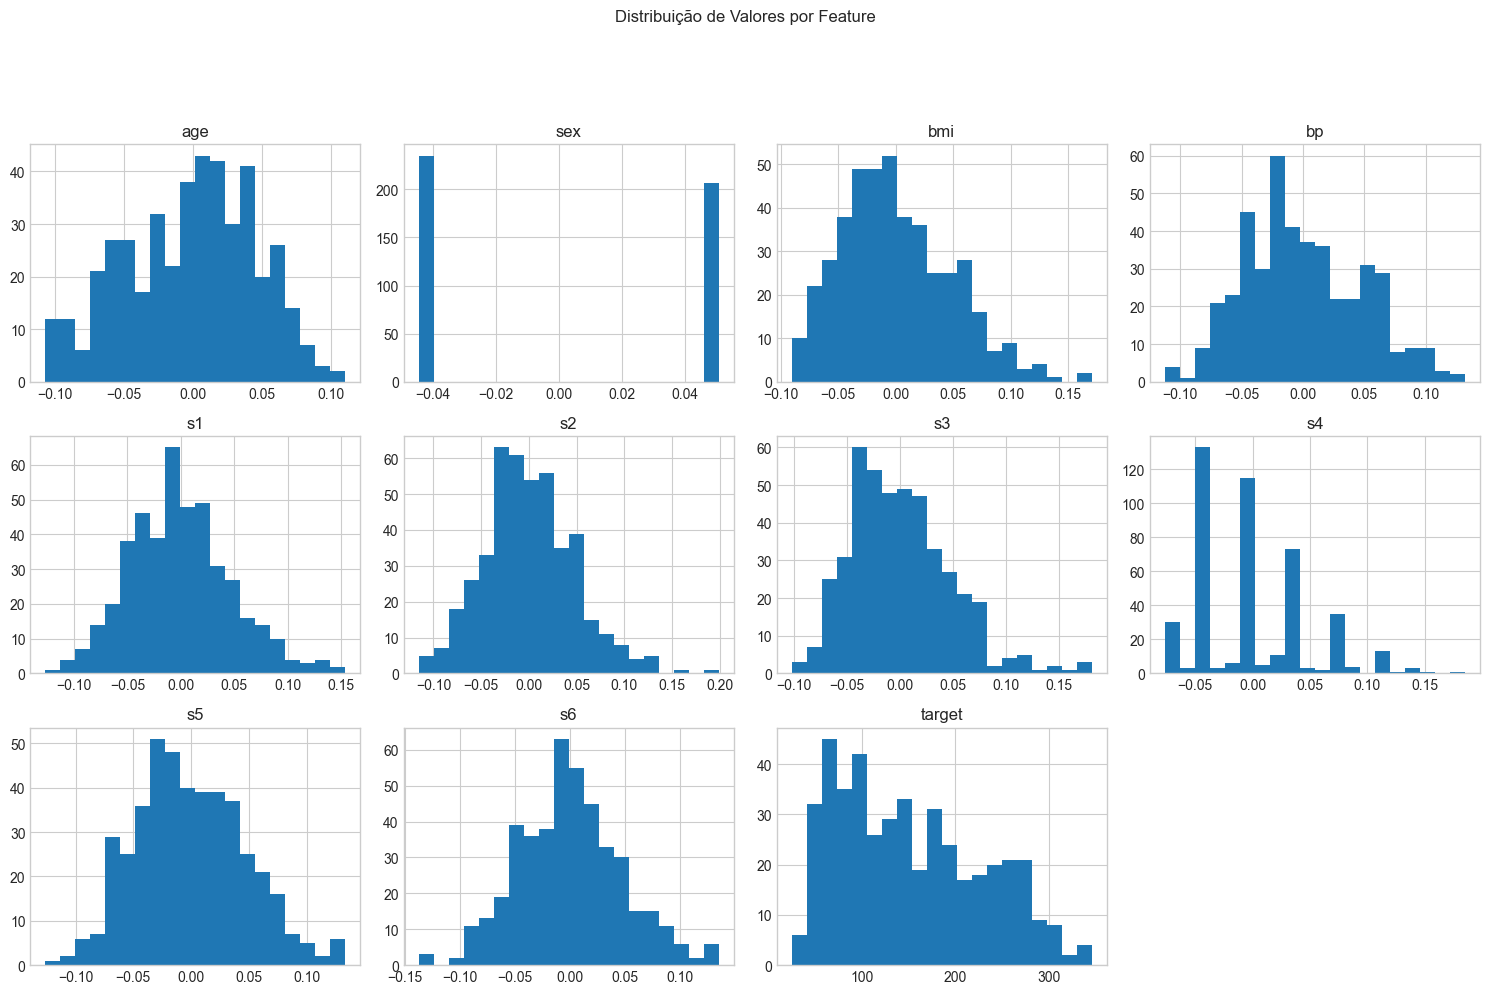

In [25]:
# Célula 4.1: Análise de Distribuição (Histogramas)

# Plotar a distribuição de cada feature para analisar suas escalas
print("Distribuição de Valores por Feature:")
df.hist(bins=20, figsize=(15, 10), layout=(3, 4))
plt.suptitle('Distribuição de Valores por Feature', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

--- Avaliação do Modelo com Todas as Features (Cálculos Manuais) ---
R² (Treino): 0.5279
R² (Teste):  0.4526
RMSE (Teste): 53.8534

Intercepto: 153.73654390934846

Features mais importantes por peso absoluto:
s1     44.448856
s5     35.161195
bmi    25.607121
s2     24.640954
bp     16.828872
s4     13.138784
sex    11.511809
s3      7.676978
s6      2.351364
age     1.753758
dtype: float64


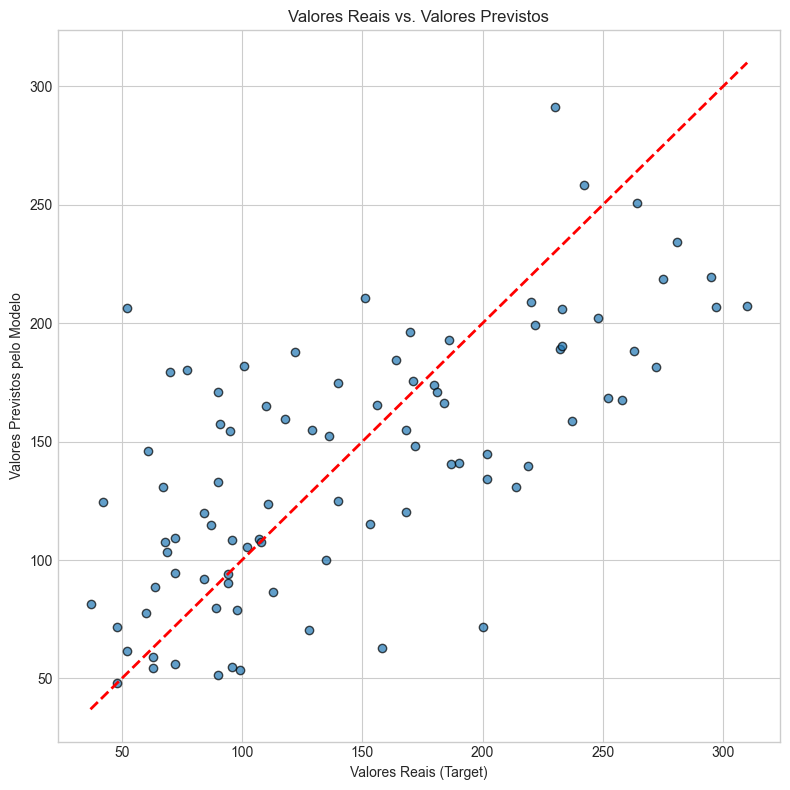

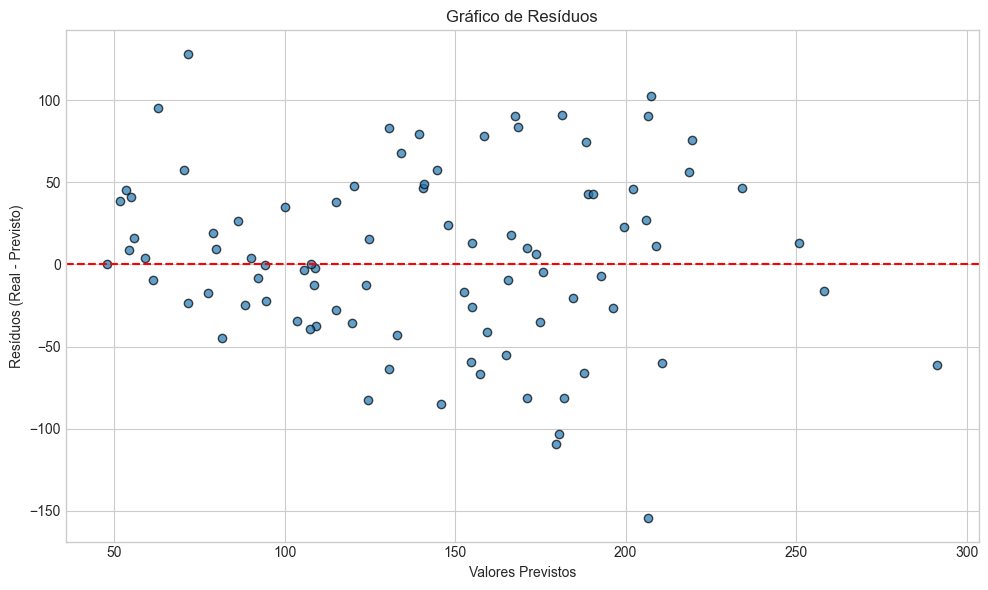

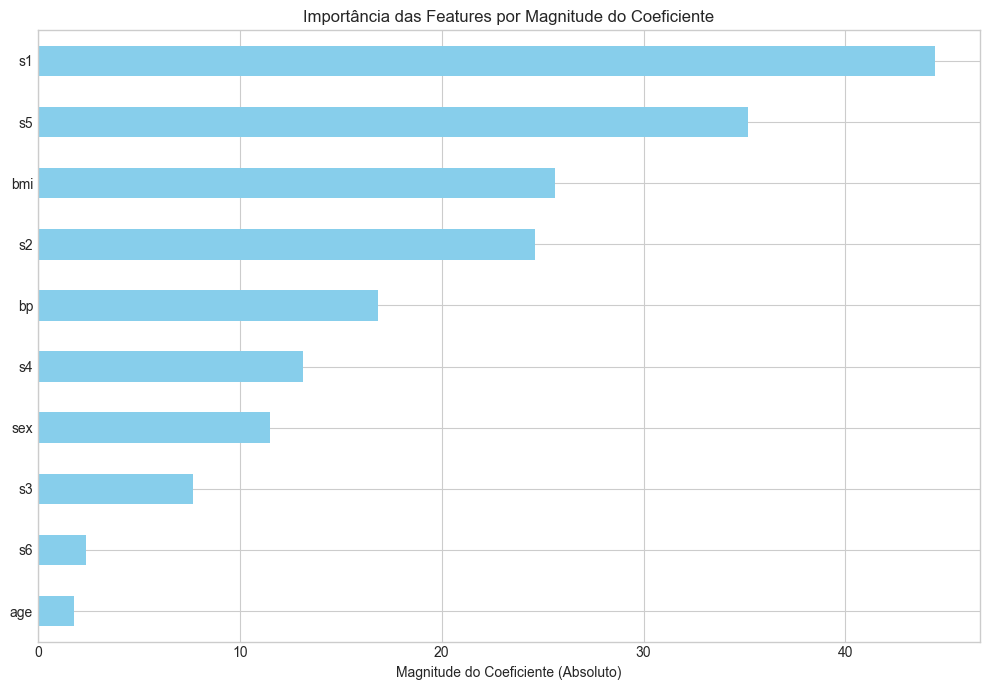

In [35]:
# ============================================
# Célula 5 — Modelo COMPLETO (MANUAL, unificada)
# ============================================

# 1) Definir features (X) e alvo (y)
X = df.drop('target', axis=1)
y = df['target']  # Series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3) Pré-processamento (Padronização)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 4) Regressão Linear MANUAL (pseudo-inversa estável)
#    - Monta matriz de projeto com intercepto e resolve por Equação Normal com pinv
Xtr = X_train_scaled
Xte = X_test_scaled
ones_tr = np.ones((Xtr.shape[0], 1))
ones_te = np.ones((Xte.shape[0], 1))
Xtr_b = np.hstack([ones_tr, Xtr])  # [1, x1, x2, ...]
Xte_b = np.hstack([ones_te, Xte])

ytr = y_train.values.reshape(-1, 1)
yte = y_test.values.reshape(-1, 1)

# beta = (X'X)^+ X'y   (pseudo-inversa para robustez numérica)
XtX = Xtr_b.T @ Xtr_b
Xty = Xtr_b.T @ ytr
beta = np.linalg.pinv(XtX) @ Xty   # shape (p+1, 1)

# Intercepto e coeficientes (em espaço padronizado)
intercept_full   = float(beta[0, 0])
coef_full_vals   = beta[1:, 0].copy()

# 5) Predições (MANUAL)
y_train_pred = (Xtr_b @ beta).ravel()
y_test_pred  = (Xte_b @ beta).ravel()

# 6) Avaliação (MANUAL)
def manual_r2_score(y_true, y_pred):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - y_true.mean())**2)
    return 1.0 - ss_res/ss_tot

def manual_rmse(y_true, y_pred):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()
    return np.sqrt(np.mean((y_true - y_pred)**2))

r2_train = manual_r2_score(ytr, y_train_pred)
r2_test  = manual_r2_score(yte, y_test_pred)
rmse_test = manual_rmse(yte, y_test_pred)

print("--- Avaliação do Modelo com Todas as Features (Cálculos Manuais) ---")
print(f"R² (Treino): {r2_train:.4f}")
print(f"R² (Teste):  {r2_test:.4f}")
print(f"RMSE (Teste): {rmse_test:.4f}\n")

# 7) Coeficientes
print("Intercepto:", intercept_full)
coef_full = pd.Series(coef_full_vals, index=feature_names)
print("\nFeatures mais importantes por peso absoluto:")
print(coef_full.abs().sort_values(ascending=False))

# ============================================
# Análise Gráfica (unificada aqui)
# ============================================

# --- 1. Gráfico de Predito vs. Real ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_pred, alpha=0.7, edgecolors='k')
# Linha de referência y=x
y_min = min(float(y_test.min()), float(y_test_pred.min()))
y_max = max(float(y_test.max()), float(y_test_pred.max()))
plt.plot([y_min, y_max], [y_min, y_max], 'r--', lw=2)
plt.title('Valores Reais vs. Valores Previstos')
plt.xlabel('Valores Reais (Target)')
plt.ylabel('Valores Previstos pelo Modelo')
plt.tight_layout()
plt.show()

# --- 2. Gráfico de Resíduos ---
residuos = y_test.values - y_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuos, alpha=0.7, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Resíduos')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos (Real - Previsto)')
plt.tight_layout()
plt.show()

# --- 3. Gráfico de Importância das Features ---
plt.figure(figsize=(10, 7))
coef_full.abs().sort_values().plot(kind='barh', color='skyblue')
plt.title('Importância das Features por Magnitude do Coeficiente')
plt.xlabel('Magnitude do Coeficiente (Absoluto)')
plt.tight_layout()
plt.show()


Features removidas (menor correlação com o alvo): ['sex', 'age']

--- Avaliação do Modelo Reduzido (MANUAL) ---
R² (Treino): 0.5107
R² (Teste):  0.4367
RMSE (Teste): 54.6278

Intercepto (reduzido): 153.73654390934846

Features mais importantes por peso absoluto (modelo reduzido):
s1     42.236728
s5     36.466223
bmi    27.861157
s2     24.321307
bp     14.758178
s3      9.162575
s4      8.739119
s6      1.861219
dtype: float64


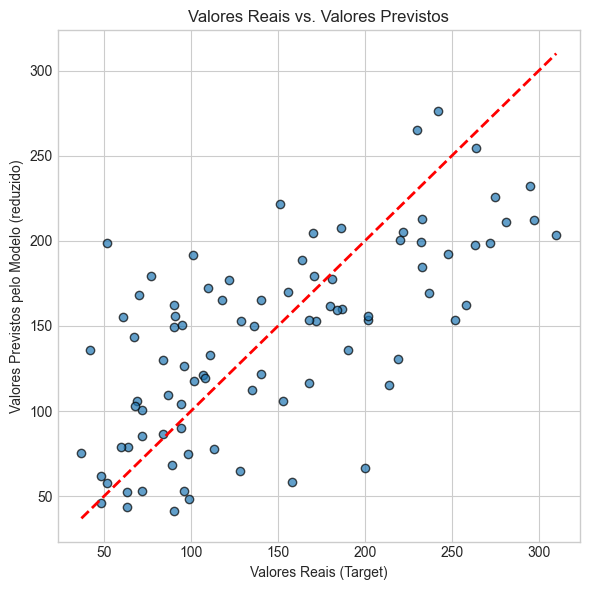

In [36]:
# ===========================================================
# Célula 6 — Modelo com Features Selecionadas (MANUAL, mesmo split)
# ===========================================================

# 1) Selecionar features a remover (menor correlação absoluta)
features_to_drop = ['sex', 'age']
print(f"Features removidas (menor correlação com o alvo): {features_to_drop}\n")

# 2) Reutilizar o MESMO split da Célula 5 (NÃO chamar train_test_split de novo)
cols_keep = [c for c in X.columns if c not in features_to_drop]
feature_names_reduced = cols_keep

Xtr_r = X_train[cols_keep].values
Xte_r = X_test[cols_keep].values
ytr   = y_train.values.reshape(-1, 1)
yte   = y_test.values.reshape(-1,  1)

# 3) Pré-processamento (Padronização) apenas nas features reduzidas
scaler_reduced = StandardScaler()
Xtr_r_s = scaler_reduced.fit_transform(Xtr_r)
Xte_r_s = scaler_reduced.transform(Xte_r)

# 4) Regressão Linear MANUAL (pseudo-inversa) com intercepto
ones_tr = np.ones((Xtr_r_s.shape[0], 1))
ones_te = np.ones((Xte_r_s.shape[0], 1))
Xtr_r_b = np.hstack([ones_tr, Xtr_r_s])
Xte_r_b = np.hstack([ones_te, Xte_r_s])

# beta = (X'X)^+ X'y
XtX_r = Xtr_r_b.T @ Xtr_r_b
Xty_r = Xtr_r_b.T @ ytr
beta_r = np.linalg.pinv(XtX_r) @ Xty_r   # estável numericamente

intercept_reduced = float(beta_r[0, 0])
coef_reduced_vals = beta_r[1:, 0].copy()

# 5) Predições (MANUAL)
y_train_pred_reduced = (Xtr_r_b @ beta_r).ravel()
y_test_pred_reduced  = (Xte_r_b @ beta_r).ravel()

# 6) Avaliação (MANUAL) — mesmas funções da Célula 5 (redeclara se necessário)
def manual_r2_score(y_true, y_pred):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - y_true.mean())**2)
    return 1.0 - ss_res/ss_tot

def manual_rmse(y_true, y_pred):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()
    return np.sqrt(np.mean((y_true - y_pred)**2))

r2_train_reduced = manual_r2_score(ytr, y_train_pred_reduced)
r2_test_reduced  = manual_r2_score(yte, y_test_pred_reduced)
rmse_test_reduced = manual_rmse(yte, y_test_pred_reduced)

print("--- Avaliação do Modelo Reduzido (MANUAL) ---")
print(f"R² (Treino): {r2_train_reduced:.4f}")
print(f"R² (Teste):  {r2_test_reduced:.4f}")
print(f"RMSE (Teste): {rmse_test_reduced:.4f}\n")

# 7) Coeficientes do modelo reduzido
print("Intercepto (reduzido):", intercept_reduced)
coef_reduced = pd.Series(coef_reduced_vals, index=feature_names_reduced)
print("\nFeatures mais importantes por peso absoluto (modelo reduzido):")
print(coef_reduced.abs().sort_values(ascending=False))

# 8) Gráfico Real vs Previsto (teste) — reduzido
plt.figure(figsize=(6,6))
plt.scatter(yte, y_test_pred_reduced, alpha=0.7, edgecolors='k')
ymin = float(min(yte.min(), y_test_pred_reduced.min()))
ymax = float(max(yte.max(), y_test_pred_reduced.max()))
plt.plot([ymin, ymax], [ymin, ymax], 'r--', lw=2)
plt.xlabel('Valores Reais (Target)')
plt.ylabel('Valores Previstos pelo Modelo (reduzido)')
plt.title('Valores Reais vs. Valores Previstos')
plt.tight_layout()
plt.show()


C:\Users\Gustavo\AppData\Local\Temp\ipykernel_13980\2342121983.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scale_x, mean_x = float(sx.scale_), float(sx.mean_)
C:\Users\Gustavo\AppData\Local\Temp\ipykernel_13980\2342121983.py:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scale_y, mean_y = float(sy.scale_), float(sy.mean_)


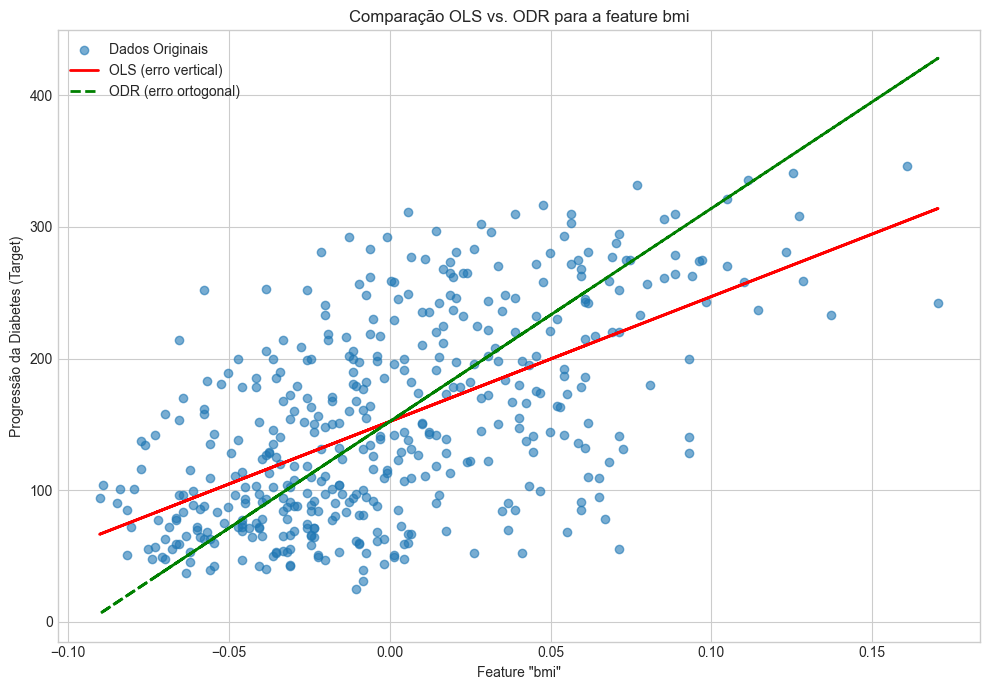


--- Coeficientes em z-score ---
OLS_z -> m=0.586450,  b=-0.000000
ODR_z -> m=1.000000,  b=-0.000000

--- Coeficientes na escala ORIGINAL ---
OLS   -> Inclinação (m): 949.435260, Intercepto (b): 152.133484
ODR   -> Inclinação (m): 1618.953095, Intercepto (b): 152.133484


In [17]:
# ===========================================================
# Célula 7: Parte B — Comparação OLS vs. ODR (corrigida)
# ===========================================================

# --- 1) Preparar Dados (uma feature) ---
X_bmi = df[['bmi']].values          # coluna já ~padronizada como feature do dataset
y_target = df['target'].values.reshape(-1, 1)  # target em escala original

# --- 2) Padronizar X e Y para ODR/OLS JUSTOS (perda é geométrica) ---
sx = StandardScaler().fit(X_bmi)
sy = StandardScaler().fit(y_target)

Xz = sx.transform(X_bmi).ravel()    # z-score de X
Yz = sy.transform(y_target).ravel() # z-score de Y

# --- 3) OLS MANUAL em z-score (regressão simples) ---
# m = cov(Xz, Yz)/var(Xz);  b = mean(Yz) - m*mean(Xz)
x_bar = float(np.mean(Xz))
y_bar = float(np.mean(Yz))
cov_xy = float(np.mean((Xz - x_bar)*(Yz - y_bar)))
var_x  = float(np.mean((Xz - x_bar)**2)) + 1e-12
m_ols = cov_xy / var_x
b_ols = y_bar - m_ols * x_bar

# --- 4) ODR/TLS em z-score: minimizar distância perpendicular ---
def odr_loss(m, b):
    r = m*Xz + b - Yz
    return np.sum(r*r) / (m*m + 1.0 + 1e-12)

# Busca apenas em m (faixa coerente em z-score); b "fechado" (média dos resíduos = 0)
best_m, best_b, best_L = None, None, np.inf
for m in np.linspace(-3.0, 3.0, 601):
    b = float(np.mean(Yz - m*Xz))
    L = odr_loss(m, b)
    if L < best_L:
        best_m, best_b, best_L = m, b, L

# --- 5) Converter retas (z-score -> escala original) para plot e impressão ---
# y_hat = mean_y + scale_y * ( m * ( (x - mean_x)/scale_x ) + b )
# slope_original = (scale_y/scale_x) * m
# intercept_original = mean_y + scale_y*b - slope_original * mean_x
scale_x, mean_x = float(sx.scale_), float(sx.mean_)
scale_y, mean_y = float(sy.scale_), float(sy.mean_)

def to_original_params(m, b):
    slope = (scale_y/scale_x) * m
    inter = mean_y + scale_y*b - slope*mean_x
    return slope, inter

m_ols_orig, b_ols_orig   = to_original_params(m_ols,  b_ols)
m_odr_orig, b_odr_orig   = to_original_params(best_m, best_b)

def line_in_original(m, b, x_original):
    xz = (x_original - mean_x) / scale_x
    yz = m * xz + b
    return mean_y + scale_y * yz

# --- 6) Plot da Comparação (em escala original) ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 7))
plt.scatter(X_bmi, y_target, alpha=0.6, label='Dados Originais')

# OLS e ODR reconvertidos
plt.plot(X_bmi, line_in_original(m_ols,  b_ols,  X_bmi),  color='red',   lw=2, label='OLS (erro vertical)')
plt.plot(X_bmi, line_in_original(best_m, best_b, X_bmi),  color='green', lw=2, ls='--', label='ODR (erro ortogonal)')

plt.title('Comparação OLS vs. ODR para a feature bmi')
plt.xlabel('Feature "bmi"')
plt.ylabel('Progressão da Diabetes (Target)')
plt.legend()
plt.tight_layout()
plt.show()

# --- 7) Resultados dos Coeficientes (em z-score e em escala original) ---
print("\n--- Coeficientes em z-score ---")
print(f"OLS_z -> m={m_ols:.6f},  b={b_ols:.6f}")
print(f"ODR_z -> m={best_m:.6f},  b={best_b:.6f}")

print("\n--- Coeficientes na escala ORIGINAL ---")
print(f"OLS   -> Inclinação (m): {m_ols_orig:.6f}, Intercepto (b): {b_ols_orig:.6f}")
print(f"ODR   -> Inclinação (m): {m_odr_orig:.6f}, Intercepto (b): {b_odr_orig:.6f}")
